In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# Lista 1
# Importando dados
!wget https://raw.githubusercontent.com/pinheirovictor/2024.2_QXD0099_persistencia-02A/refs/heads/main/vendas.csv

--2024-11-01 00:24:43--  https://raw.githubusercontent.com/pinheirovictor/2024.2_QXD0099_persistencia-02A/refs/heads/main/vendas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14752 (14K) [text/plain]
Saving to: ‘vendas.csv.5’

vendas.csv.5        100%[===================>]  14.41K  --.-KB/s    in 0s      

2024-11-01 00:24:43 (30.0 MB/s) - ‘vendas.csv.5’ saved [14752/14752]



In [103]:
# Carregar o CSV: Leia o arquivo vendas.csv para um DataFrame usando pandas.
df = pd.read_csv("vendas.csv")

In [63]:
df

,Data,Produto,Quantidade,Preco_Unitario
0,14/02/2023,Produto C,2,13.04
1,17/02/2023,Produto D,19,17.46
2,06/03/2023,Produto C,1,78.92
3,09/03/2023,Produto D,12,85.82
4,09/03/2023,Produto A,19,42.69
...,...,...,...,...
495,16/02/2023,Produto B,12,95.08
496,01/01/2023,Produto A,4,43.42
497,21/02/2023,Produto D,8,70.82
498,08/02/2023,Produto A,19,92.41


In [104]:
# Crie uma nova coluna chamada Total_Venda, que representa o valor total de cada venda (Quantidade * Preço_Unitário).
df['Total_Vendas'] = df['Quantidade'] * df['Preco_Unitario']

In [65]:
df

,Data,Produto,Quantidade,Preco_Unitario,Total_Vendas
0,14/02/2023,Produto C,2,13.04,26.08
1,17/02/2023,Produto D,19,17.46,331.74
2,06/03/2023,Produto C,1,78.92,78.92
3,09/03/2023,Produto D,12,85.82,1029.84
4,09/03/2023,Produto A,19,42.69,811.11
...,...,...,...,...,...
495,16/02/2023,Produto B,12,95.08,1140.96
496,01/01/2023,Produto A,4,43.42,173.68
497,21/02/2023,Produto D,8,70.82,566.56
498,08/02/2023,Produto A,19,92.41,1755.79


In [78]:
# Agrupe os dados por Produto e calcule o total de vendas para cada produto.
total_vendas = df.groupby('Produto')['Total_Vendas'].sum()
total_vendas

,Total_Vendas
Produto,
Produto A,56157.09
Produto B,59552.39
Produto C,62625.58
Produto D,56742.88
Produto E,53471.72


In [87]:
# Filtre as vendas do mês de janeiro (1) de 2023.
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
vendas_janeiro = df[(df['Data'].dt.month == 1) & (df['Data'].dt.year == 2023)]
vendas_janeiro

,Data,Produto,Quantidade,Preco_Unitario,Total_Vendas
5,2023-01-10,Produto D,19,32.21,611.99
7,2023-01-22,Produto A,16,23.71,379.36
13,2023-01-13,Produto C,15,63.57,953.55
22,2023-01-26,Produto B,19,32.29,613.51
25,2023-01-10,Produto E,18,39.10,703.80
...,...,...,...,...,...
488,2023-01-31,Produto A,9,78.17,703.53
491,2023-01-08,Produto B,16,95.07,1521.12
492,2023-01-22,Produto E,16,31.78,508.48
493,2023-01-09,Produto C,10,32.53,325.30


In [80]:
# Crie um DataFrame separado com esses dados.
vendas_janeiro.to_csv('vendas_janeiro.csv')

In [94]:
# Salvar o total de vendas por produto em uma nova planilha Excel
total_vendas = total_vendas.reset_index()

with pd.ExcelWriter('total_vendas_produto.xlsx', engine='openpyxl') as writer:
    for _, row in total_vendas.iterrows():
        produto = row['Produto']
        total = row['Total_Vendas']

        # Criar um DataFrame para o produto
        dados_produto = pd.DataFrame({
            'Produto': [produto],
            'Total_Vendas': [total]
        })

        # Salvar cada produto em uma aba
        dados_produto.to_excel(writer, sheet_name=produto, index=False)

<class 'pandas.core.series.Series'>


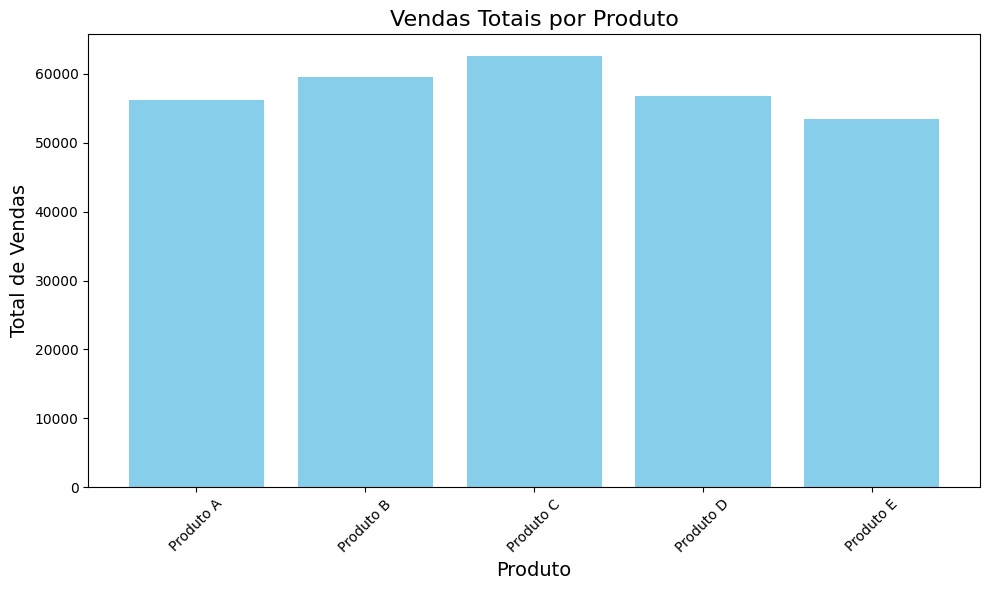

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(total_vendas['Produto'], total_vendas['Total_Vendas'], color='skyblue')
plt.title('Vendas Totais por Produto', fontsize=16)
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Total de Vendas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()